In [1]:
import pandas as pd
athlete_events1_csv = pd.read_csv(r'C:\Users\kingW\Downloads\athlete_events.csv\athlete_events.csv')
noc_regions = pd.read_csv(r'C:\Users\kingW\Downloads\noc_regions.csv')

In [2]:
import pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [3]:
cleaning1 = """SELECT * FROM athlete_events1_csv
WHERE Weight != 'NA' 
AND Height != 'NA'
AND Sex != 'NA'
AND Age != 'NA'
AND Team != 'NA'
AND NOC != 'NA'
AND Games != 'NA'
AND Year != 'NA'
AND Season != 'NA'
AND City != 'NA'
AND Sport != 'NA'
AND Event != 'NA' ;"""

df = pysqldf(cleaning1)
df = df.rename(columns={'NOC': 'NOC1'})
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC1,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206160,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
206161,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
206162,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
206163,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


In [4]:
leftjoin = """SELECT *
FROM df
LEFT JOIN noc_regions
ON df.NOC1 = noc_regions.NOC;"""

df = pysqldf(leftjoin)


In [5]:
groupby = """
SELECT NOC,
       COUNT(Name) AS Number_of_Athletes,
       COUNT(CASE WHEN Medal = 'Gold' THEN 1 END) AS Gold_Medals,
       COUNT(CASE WHEN Medal = 'Silver' THEN 1 END) AS Silver_Medals,
       COUNT(CASE WHEN Medal = 'Bronze' THEN 1 END) AS Bronze_Medals
FROM df
GROUP BY NOC
ORDER BY Gold_Medals DESC;"""

df2 = pysqldf(groupby)
df2

,NOC,Number_of_Athletes,Gold_Medals,Silver_Medals,Bronze_Medals
0,USA,14214,2115,1286,982
1,URS,4874,982,641,623
2,GER,7302,547,497,568
3,GDR,2608,396,324,275
4,RUS,4809,379,357,398
...,...,...,...,...,...
221,ANG,245,0,0,0
222,AND,135,0,0,0
223,ALB,57,0,0,0
224,AHO,51,0,0,0


In [6]:
sports = """
SELECT 
    NOC,
    Sport,
    Event,
    Medal,
    Year,
    Season
FROM df;"""

df4 = pysqldf(sports)

unique = """
SELECT DISTINCT *
FROM df4;"""

df5 = pysqldf(unique)
df5

,NOC,Sport,Event,Medal,Year,Season
0,CHN,Basketball,Basketball Men's Basketball,None,1992,Summer
1,CHN,Judo,Judo Men's Extra-Lightweight,None,2012,Summer
2,NED,Speed Skating,Speed Skating Women's 500 metres,None,1988,Winter
3,NED,Speed Skating,"Speed Skating Women's 1,000 metres",None,1988,Winter
4,NED,Speed Skating,Speed Skating Women's 500 metres,None,1992,Winter
...,...,...,...,...,...,...
102226,POL,Speed Skating,"Speed Skating Men's 5,000 metres",None,1998,Winter
102227,POL,Speed Skating,"Speed Skating Men's 5,000 metres",None,2002,Winter
102228,POL,Speed Skating,"Speed Skating Men's 10,000 metres",None,2002,Winter
102229,POL,Speed Skating,"Speed Skating Men's 5,000 metres",None,2006,Winter


In [7]:


GB = """
SELECT 
    NOC,
    Year,
    COUNT(DISTINCT(Name)) AS Number_of_Athletes
FROM df
WHERE NOC = 'GBR' and Season = 'Summer'
group by NOC,Year
order by Year;"""

df3 = pysqldf(GB)
df3

,NOC,Year,Number_of_Athletes
0,GBR,1896,1
1,GBR,1900,5
2,GBR,1904,1
3,GBR,1906,11
4,GBR,1908,35
5,GBR,1912,18
6,GBR,1920,14
7,GBR,1924,17
8,GBR,1928,14
9,GBR,1932,13


In [8]:
GB2 = """
SELECT 
    NOC,
    Year,
    Season,
    COUNT(CASE WHEN Medal = 'Gold' THEN 1 END) AS Gold_Medals,
    COUNT(CASE WHEN Medal = 'Silver' THEN 1 END) AS Silver_Medals,
    COUNT(CASE WHEN Medal = 'Bronze' THEN 1 END) AS Bronze_Medals
FROM df5
WHERE NOC = 'GBR' and Season = 'Summer'
group by NOC,Year
order by Year;"""

df6 = pysqldf(GB2)
df6

,NOC,Year,Season,Gold_Medals,Silver_Medals,Bronze_Medals
0,GBR,1896,Summer,1,1,0
1,GBR,1900,Summer,2,1,1
2,GBR,1904,Summer,0,1,0
3,GBR,1906,Summer,3,4,1
4,GBR,1908,Summer,15,10,4
5,GBR,1912,Summer,3,2,4
6,GBR,1920,Summer,3,4,2
7,GBR,1924,Summer,3,2,2
8,GBR,1928,Summer,2,2,1
9,GBR,1932,Summer,1,3,2


In [9]:
join = """
SELECT 
    df6.NOC,
    df6.Year,
    df3.Number_of_Athletes,
    df6.Gold_Medals,
    df6.Silver_Medals,
    df6.Bronze_Medals,
    df6.Gold_Medals + df6.Silver_Medals + df6.Bronze_Medals as Total
    
FROM df6
LEFT JOIN df3 ON df6.Year = df3.Year


;"""

combined = pysqldf(join)
combined

,NOC,Year,Number_of_Athletes,Gold_Medals,Silver_Medals,Bronze_Medals,Total
0,GBR,1896,1,1,1,0,2
1,GBR,1900,5,2,1,1,4
2,GBR,1904,1,0,1,0,1
3,GBR,1906,11,3,4,1,8
4,GBR,1908,35,15,10,4,29
5,GBR,1912,18,3,2,4,9
6,GBR,1920,14,3,4,2,9
7,GBR,1924,17,3,2,2,7
8,GBR,1928,14,2,2,1,5
9,GBR,1932,13,1,3,2,6


R-squared: 0.7656296739764064


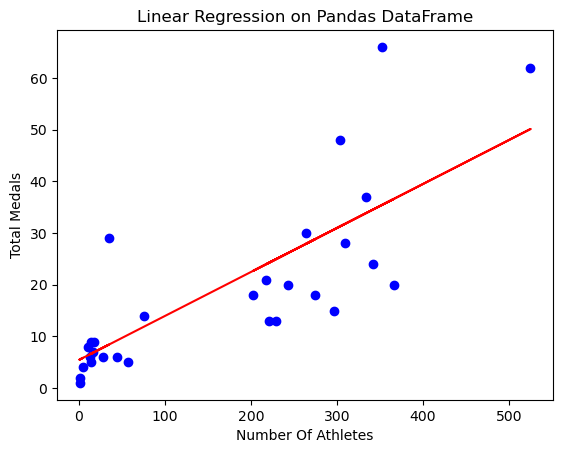

In [10]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Step 2: Prepare the data
X = combined[['Number_of_Athletes']]  # Independent variable
y = combined['Total']    # Dependent variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

# Step 7: Visualize the regression line
plt.scatter(X, y, color='blue')  # Actual data points
plt.plot(X, model.predict(X), color='red')  # Regression line
plt.xlabel('Number Of Athletes')
plt.ylabel('Total Medals')
plt.title('Linear Regression on Pandas DataFrame')
plt.show()


In [11]:
basket = """
SELECT 
    Name,
    Age, 
    Weight, 
    Height,
    region,
    Medal,
    CASE WHEN Medal = 'Gold' THEN 1
        WHEN Medal = 'Silver' THEN 1
        WHEN Medal = 'Bronze' THEN 1
    ELSE 0 END AS Medal_binary

FROM df
WHERE Event = 'Basketball Men''s Basketball' 
 ;"""

df_basket = pysqldf(basket)
df_basket

,Name,Age,Weight,Height,region,Medal,Medal_binary
0,A Dijiang,24.0,80.0,180.0,China,None,0
1,Alessandro Abbio,29.0,85.0,195.0,Italy,None,0
2,Ahmed El-Sayed Abdel Hamid Mobarak,25.0,85.0,189.0,Egypt,None,0
3,Amir Abdel Meguid,23.0,67.0,178.0,Egypt,None,0
4,Amir Abdel Meguid,27.0,67.0,178.0,Egypt,None,0
...,...,...,...,...,...,...,...
2456,Eurelijus ukauskas,27.0,115.0,218.0,Lithuania,Bronze,1
2457,Eurelijus ukauskas,30.0,115.0,218.0,Lithuania,None,0
2458,Mindaugas ukauskas,20.0,100.0,201.0,Lithuania,Bronze,1
2459,Mindaugas ukauskas,28.0,100.0,201.0,Lithuania,None,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Explanatory variables (X) and response variable (y)
X = df_basket[['Age', 'Weight', 'Height']]
y = df_basket['Medal_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_
print(f'Intercept: {intercept}')

Accuracy: 0.7261663286004056
Confusion Matrix:
[[358   0]
 [135   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       358
           1       0.00      0.00      0.00       135

    accuracy                           0.73       493
   macro avg       0.36      0.50      0.42       493
weighted avg       0.53      0.73      0.61       493

Intercept: [-5.49504494]


c:\Users\kingW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kingW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kingW\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
basketball_mens = """
SELECT 
    Name,
    Age, 
    Weight, 
    Height,
    region,
    Medal,
    CASE WHEN Event = 'Basketball Men''s Basketball' THEN 1
    ELSE 0 END AS Basketball_Men

FROM df

 ;"""

df_basketball_mens = pysqldf(basketball_mens)
df_basketball_mens

,Name,Age,Weight,Height,region,Medal,Basketball_Men
0,A Dijiang,24.0,80.0,180.0,China,None,1
1,A Lamusi,23.0,60.0,170.0,China,None,0
2,Christine Jacoba Aaftink,21.0,82.0,185.0,Netherlands,None,0
3,Christine Jacoba Aaftink,21.0,82.0,185.0,Netherlands,None,0
4,Christine Jacoba Aaftink,25.0,82.0,185.0,Netherlands,None,0
...,...,...,...,...,...,...,...
206160,Andrzej ya,29.0,89.0,179.0,Poland,None,0
206161,Piotr ya,27.0,59.0,176.0,Poland,None,0
206162,Piotr ya,27.0,59.0,176.0,Poland,None,0
206163,Tomasz Ireneusz ya,30.0,96.0,185.0,Poland,None,0


In [14]:





# Explanatory variables (X) and response variable (y)
X = df_basketball_mens[['Age', 'Weight', 'Height']]
y = df_basketball_mens['Basketball_Men']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_
print(f'Intercept: {intercept}')

Accuracy: 0.9888196347585672
Confusion Matrix:
[[40713    29]
 [  432    59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40742
           1       0.67      0.12      0.20       491

    accuracy                           0.99     41233
   macro avg       0.83      0.56      0.60     41233
weighted avg       0.99      0.99      0.98     41233

Intercept: [-42.83019156]
